<span style="background-color: #FFFF00"><h1> Notebook 5: Sankey Diagram and Mapping for Migration Flows</h1> </span>

After the midterm, Yoh recommended Sankey diagram to present how migration flows. So, in this notebook, we explored using plotly’s Sankey diagram. In the second half of the notebook, we continued our midterm codes and presented where inflow and outflow of migration concentrate spatially on the map. 

In [1]:
# Import all modules I will be using in this notebook

import pandas as pd
import geopandas as gpd
import contextily as ctx
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np
import fiona
import pandas as pd
import geopandas as gpd
import contextily as ctx
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np

/opt/conda/lib/python3.8/site-packages/geopandas/_compat.py:106: UserWarning: The Shapely GEOS version (3.8.1-CAPI-1.13.3) is incompatible with the GEOS version PyGEOS was compiled with (3.9.0-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(


In [2]:
migration2018_rawdataNY = pd.read_csv('Data/2018_INandOut_Migration_County_NY_State.csv',
                                    dtype={
                                       'A_GEOID':str,
                                       'B_GEOID':str
                                           }
                                           )

migration2018_rawdataNY

A_GEOID B_GEOID State Name of Geography A County Name of Geography A  \
0       36001   01103                  New York              Albany County   
1       36001   02090                  New York              Albany County   
2       36001   02220                  New York              Albany County   
3       36001   04001                  New York              Albany County   
4       36001   04003                  New York              Albany County   
...       ...     ...                       ...                        ...   
14032   36123   48439                  New York               Yates County   
14033   36123   49035                  New York               Yates County   
14034   36123   51033                  New York               Yates County   
14035   36123   51700                  New York               Yates County   
14036   36123   55073                  New York               Yates County   

      State/U.S. Island Area/Foreign Region of Geography B  \
0                                                Alabama     
1                                                 Alaska     
2                                                 Alaska     
3                                                Arizona     
4                                                Arizona     
...                                                  ...     
14032                                              Texas     
14033                                               Utah     
14034                                           Virginia     
14035                                           Virginia     
14036                                          Wisconsin     

         County Name of Geography B  Flow from Geography B to Geography A  \
0                     Morgan County                                     0   
1      Fairbanks North Star Borough                                     0   
2            Sitka City and Borough                                     0   
3                     Apache County                                     0   
4                    Cochise County                                     0   
...                             ...                                   ...   
14032                Tarrant County                                    52   
14033              Salt Lake County                                     0   
14034               Caroline County                                    26   
14035             Newport News city                                     0   
14036               Marathon County                                     0   

       Counterflow from Geography A to Geography B1  
0                                                14  
1                                                21  
2                                                 4  
3                                                18  
4                                                14  
...                                             ...  
14032                                             0  
14033                                            12  
14034                                             0  
14035                                            15  
14036                                            18  

[14037 rows x 8 columns]

In [3]:
migration2018_rawdataCT = pd.read_csv('Data/2018_INandOut_Migration_County_CT_State.csv',
                                    dtype={
                                       'A_GEOID':str,
                                       'B_GEOID':str
                                           }
                                           )

migration2018_rawdataCT

A_GEOID B_GEOID State Name of Geography A County Name of Geography A  \
0      09001   01031               Connecticut           Fairfield County   
1      09001   01033               Connecticut           Fairfield County   
2      09001   01069               Connecticut           Fairfield County   
3      09001   01073               Connecticut           Fairfield County   
4      09001   01081               Connecticut           Fairfield County   
...      ...     ...                       ...                        ...   
2626   09015   72071               Connecticut             Windham County   
2627   09015   72113               Connecticut             Windham County   
2628   09015   72119               Connecticut             Windham County   
2629   09015   72123               Connecticut             Windham County   
2630   09015   72151               Connecticut             Windham County   

     State/U.S. Island Area/Foreign Region of Geography B  \
0                                               Alabama     
1                                               Alabama     
2                                               Alabama     
3                                               Alabama     
4                                               Alabama     
...                                                 ...     
2626                                        Puerto Rico     
2627                                        Puerto Rico     
2628                                        Puerto Rico     
2629                                        Puerto Rico     
2630                                        Puerto Rico     

     County Name of Geography B  Flow from Geography B to Geography A  \
0                 Coffee County                                    84   
1                Colbert County                                    15   
2                Houston County                                     0   
3              Jefferson County                                    12   
4                    Lee County                                     0   
...                         ...                                   ...   
2626          Isabela Municipio                                     0   
2627            Ponce Municipio                                    83   
2628       Río Grande Municipio                                    22   
2629          Salinas Municipio                                    52   
2630          Yabucoa Municipio                                     0   

      Counterflow from Geography A to Geography B1  
0                                                0  
1                                                0  
2                                                1  
3                                                6  
4                                               32  
...                                            ...  
2626                                            22  
2627                                             0  
2628                                             0  
2629                                             0  
2630                                            55  

[2631 rows x 8 columns]

In [4]:
migration2018_rawdataPA = pd.read_csv('Data/2018_INandOut_Migration_County_PA_State.csv',
                                    dtype={
                                       'A_GEOID':str,
                                       'B_GEOID':str
                                           }
                                           )

migration2018_rawdataPA

A_GEOID B_GEOID State Name of Geography A County Name of Geography A  \
0       42001   01083              Pennsylvania               Adams County   
1       42001   04013              Pennsylvania               Adams County   
2       42001   04019              Pennsylvania               Adams County   
3       42001   06037              Pennsylvania               Adams County   
4       42001   06041              Pennsylvania               Adams County   
...       ...     ...                       ...                        ...   
13925   42133   72109              Pennsylvania                York County   
13926   42133   72113              Pennsylvania                York County   
13927   42133   72127              Pennsylvania                York County   
13928   42133   72145              Pennsylvania                York County   
13929   42133   72153              Pennsylvania                York County   

      State/U.S. Island Area/Foreign Region of Geography B  \
0                                                Alabama     
1                                                Arizona     
2                                                Arizona     
3                                             California     
4                                             California     
...                                                  ...     
13925                                        Puerto Rico     
13926                                        Puerto Rico     
13927                                        Puerto Rico     
13928                                        Puerto Rico     
13929                                        Puerto Rico     

      County Name of Geography B  Flow from Geography B to Geography A  \
0               Limestone County                                     0   
1                Maricopa County                                     0   
2                    Pima County                                     9   
3             Los Angeles County                                    23   
4                   Marin County                                    27   
...                          ...                                   ...   
13925         Patillas Municipio                                     0   
13926            Ponce Municipio                                    76   
13927         San Juan Municipio                                    26   
13928        Vega Baja Municipio                                    48   
13929            Yauco Municipio                                    78   

       Counterflow from Geography A to Geography B1  
0                                                86  
1                                                10  
2                                                32  
3                                                 0  
4                                                 0  
...                                             ...  
13925                                             9  
13926                                             0  
13927                                             0  
13928                                             0  
13929                                             0  

[13930 rows x 8 columns]

In [5]:
migration2018_rawdataNJ = pd.read_csv('Data/2018_INandOut_Migration_County_NJ_State.csv',
                                    dtype={
                                       'A_GEOID':str,
                                       'B_GEOID':str
                                           }
                                           )

migration2018_rawdataNJ

A_GEOID B_GEOID State Name of Geography A County Name of Geography A  \
0      34001   04013                New Jersey            Atlantic County   
1      34001   05085                New Jersey            Atlantic County   
2      34001   06001                New Jersey            Atlantic County   
3      34001   06017                New Jersey            Atlantic County   
4      34001   06037                New Jersey            Atlantic County   
...      ...     ...                       ...                        ...   
5924   34041   54061                New Jersey              Warren County   
5925   34041   54081                New Jersey              Warren County   
5926   34041   54097                New Jersey              Warren County   
5927   34041   55031                New Jersey              Warren County   
5928   34041   72095                New Jersey              Warren County   

     State/U.S. Island Area/Foreign Region of Geography B  \
0                                               Arizona     
1                                              Arkansas     
2                                            California     
3                                            California     
4                                            California     
...                                                 ...     
5924                                      West Virginia     
5925                                      West Virginia     
5926                                      West Virginia     
5927                                          Wisconsin     
5928                                        Puerto Rico     

     County Name of Geography B  Flow from Geography B to Geography A  \
0               Maricopa County                                     0   
1                 Lonoke County                                     0   
2                Alameda County                                    15   
3              El Dorado County                                     0   
4            Los Angeles County                                    13   
...                         ...                                   ...   
5924          Monongalia County                                     5   
5925             Raleigh County                                     0   
5926              Upshur County                                     0   
5927             Douglas County                                     0   
5928          Maunabo Municipio                                     2   

      Counterflow from Geography A to Geography B1  
0                                               44  
1                                               36  
2                                               31  
3                                               96  
4                                               28  
...                                            ...  
5924                                            28  
5925                                             6  
5926                                            11  
5927                                             9  
5928                                             0  

[5929 rows x 8 columns]

In [6]:
# First, I will import the raw data for metro to metro migration in 2018. This is a CSV file.
# Add some argument to make sure the data are imported in the right data type, since GEOID/FIPS codes are sometimes hard.

migration2018_rawdataNY = pd.read_csv('Data/2018_INandOut_Migration_County_NY_State.csv',
                                    dtype={
                                       'A_GEOID':str,
                                       'B_GEOID':str
                                           }
                                           )

migration2018_rawdataNY

A_GEOID B_GEOID State Name of Geography A County Name of Geography A  \
0       36001   01103                  New York              Albany County   
1       36001   02090                  New York              Albany County   
2       36001   02220                  New York              Albany County   
3       36001   04001                  New York              Albany County   
4       36001   04003                  New York              Albany County   
...       ...     ...                       ...                        ...   
14032   36123   48439                  New York               Yates County   
14033   36123   49035                  New York               Yates County   
14034   36123   51033                  New York               Yates County   
14035   36123   51700                  New York               Yates County   
14036   36123   55073                  New York               Yates County   

      State/U.S. Island Area/Foreign Region of Geography B  \
0                                                Alabama     
1                                                 Alaska     
2                                                 Alaska     
3                                                Arizona     
4                                                Arizona     
...                                                  ...     
14032                                              Texas     
14033                                               Utah     
14034                                           Virginia     
14035                                           Virginia     
14036                                          Wisconsin     

         County Name of Geography B  Flow from Geography B to Geography A  \
0                     Morgan County                                     0   
1      Fairbanks North Star Borough                                     0   
2            Sitka City and Borough                                     0   
3                     Apache County                                     0   
4                    Cochise County                                     0   
...                             ...                                   ...   
14032                Tarrant County                                    52   
14033              Salt Lake County                                     0   
14034               Caroline County                                    26   
14035             Newport News city                                     0   
14036               Marathon County                                     0   

       Counterflow from Geography A to Geography B1  
0                                                14  
1                                                21  
2                                                 4  
3                                                18  
4                                                14  
...                                             ...  
14032                                             0  
14033                                            12  
14034                                             0  
14035                                            15  
14036                                            18  

[14037 rows x 8 columns]

In [7]:
NYMetro_4States = [migration2018_rawdataNY, migration2018_rawdataCT, migration2018_rawdataPA,migration2018_rawdataNJ]

migration2018_rawdata = pd.concat(NYMetro_4States)

migration2018_rawdata = migration2018_rawdata.reset_index()

migration2018_rawdata = migration2018_rawdata.drop(['index'],axis=1)

In [8]:
migration2018_rawdata

A_GEOID B_GEOID State Name of Geography A County Name of Geography A  \
0       36001   01103                  New York              Albany County   
1       36001   02090                  New York              Albany County   
2       36001   02220                  New York              Albany County   
3       36001   04001                  New York              Albany County   
4       36001   04003                  New York              Albany County   
...       ...     ...                       ...                        ...   
36522   34041   54061                New Jersey              Warren County   
36523   34041   54081                New Jersey              Warren County   
36524   34041   54097                New Jersey              Warren County   
36525   34041   55031                New Jersey              Warren County   
36526   34041   72095                New Jersey              Warren County   

      State/U.S. Island Area/Foreign Region of Geography B  \
0                                                Alabama     
1                                                 Alaska     
2                                                 Alaska     
3                                                Arizona     
4                                                Arizona     
...                                                  ...     
36522                                      West Virginia     
36523                                      West Virginia     
36524                                      West Virginia     
36525                                          Wisconsin     
36526                                        Puerto Rico     

         County Name of Geography B  Flow from Geography B to Geography A  \
0                     Morgan County                                     0   
1      Fairbanks North Star Borough                                     0   
2            Sitka City and Borough                                     0   
3                     Apache County                                     0   
4                    Cochise County                                     0   
...                             ...                                   ...   
36522             Monongalia County                                     5   
36523                Raleigh County                                     0   
36524                 Upshur County                                     0   
36525                Douglas County                                     0   
36526             Maunabo Municipio                                     2   

       Counterflow from Geography A to Geography B1  
0                                                14  
1                                                21  
2                                                 4  
3                                                18  
4                                                14  
...                                             ...  
36522                                            28  
36523                                             6  
36524                                            11  
36525                                             9  
36526                                             0  

[36527 rows x 8 columns]

In [9]:
migration2018_rawdata = migration2018_rawdata.drop(['State Name of Geography A','State/U.S. Island Area/Foreign Region of Geography B'],axis=1)

In [10]:
migration2018_rawdata.columns=['GEOID_A',"GEOID_B",'County_A','County_B',"B_to_A","A_to_B"]

In [11]:
migration2018_rawdata

GEOID_A GEOID_B       County_A                      County_B  B_to_A  \
0       36001   01103  Albany County                 Morgan County       0   
1       36001   02090  Albany County  Fairbanks North Star Borough       0   
2       36001   02220  Albany County        Sitka City and Borough       0   
3       36001   04001  Albany County                 Apache County       0   
4       36001   04003  Albany County                Cochise County       0   
...       ...     ...            ...                           ...     ...   
36522   34041   54061  Warren County             Monongalia County       5   
36523   34041   54081  Warren County                Raleigh County       0   
36524   34041   54097  Warren County                 Upshur County       0   
36525   34041   55031  Warren County                Douglas County       0   
36526   34041   72095  Warren County             Maunabo Municipio       2   

       A_to_B  
0          14  
1          21  
2           4  
3          18  
4          14  
...       ...  
36522      28  
36523       6  
36524      11  
36525       9  
36526       0  

[36527 rows x 6 columns]

In [12]:
NY_Metro_List = ['09001','09005','09009','34003','34013',
'34017','34019','34021','34023','34025',
'34027','34029','34031','34035','34037',
'34039','36005','36027','36047','36059',
'36061','36071','36079','36081','36085',
'36087','36103','36111','36119','42089',
'42103']

In [13]:
migration2018_Trimmed1 = migration2018_rawdata[migration2018_rawdata.GEOID_A.isin(NY_Metro_List)]

In [14]:
migration2018_Trimmed1 = migration2018_Trimmed1[migration2018_rawdata.GEOID_B.isin(NY_Metro_List)]

<ipython-input-14-6bf0f60f88e3>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  migration2018_Trimmed1 = migration2018_Trimmed1[migration2018_rawdata.GEOID_B.isin(NY_Metro_List)]


In [15]:
migration2018_Trimmed1 = migration2018_Trimmed1.reset_index()
migration2018_Trimmed2 = migration2018_Trimmed1.drop(['index'],axis=1)

In [16]:
migration2018_Trimmed2


GEOID_A GEOID_B      County_A            County_B  B_to_A  A_to_B
0     36005   09001  Bronx County    Fairfield County     288    1822
1     36005   09005  Bronx County   Litchfield County       4       8
2     36005   09009  Bronx County    New Haven County      68     746
3     36005   34003  Bronx County       Bergen County     784    1323
4     36005   34013  Bronx County        Essex County     244    1712
..      ...     ...           ...                 ...     ...     ...
855   34039   36103  Union County      Suffolk County      36      56
856   34039   36111  Union County       Ulster County       0       6
857   34039   36119  Union County  Westchester County      45     152
858   34039   42089  Union County       Monroe County       0      82
859   34039   42103  Union County         Pike County      49      41

[860 rows x 6 columns]

In [17]:
migration2018_Trimmed3 = migration2018_Trimmed2

# Calculate Inflow

In [18]:
inflow_raw = migration2018_Trimmed2

In [19]:
inflow_trimmed1 = inflow_raw.drop(['GEOID_B','County_B','A_to_B'],axis=1)

In [20]:
inflow_trimmed1

GEOID_A      County_A  B_to_A
0     36005  Bronx County     288
1     36005  Bronx County       4
2     36005  Bronx County      68
3     36005  Bronx County     784
4     36005  Bronx County     244
..      ...           ...     ...
855   34039  Union County      36
856   34039  Union County       0
857   34039  Union County      45
858   34039  Union County       0
859   34039  Union County      49

[860 rows x 3 columns]

In [21]:
inflow_trimmed2 = inflow_trimmed1.groupby(by=["GEOID_A",'County_A']).sum().reset_index()

In [22]:
inflow_trimmed2

GEOID_A            County_A  B_to_A
0    09001    Fairfield County   19508
1    09005   Litchfield County    3866
2    09009    New Haven County   11607
3    34003       Bergen County   21226
4    34013        Essex County   19458
5    34017       Hudson County   20962
6    34019    Hunterdon County    3843
7    34021       Mercer County   12594
8    34023    Middlesex County   22220
9    34025     Monmouth County   16853
10   34027       Morris County   13647
11   34029        Ocean County   14225
12   34031      Passaic County   11380
13   34035     Somerset County   11773
14   34037       Sussex County    4504
15   34039        Union County   16218
16   36005        Bronx County   31414
17   36027     Dutchess County    9964
18   36047        Kings County   46268
19   36059       Nassau County   26907
20   36061     New York County   48589
21   36071       Orange County    7424
22   36079       Putnam County    2755
23   36081       Queens County   44732
24   36085     Richmond County    7864
25   36087     Rockland County    5855
26   36103      Suffolk County   21389
27   36111       Ulster County    4700
28   36119  Westchester County   27585
29   42089       Monroe County    3633
30   42103         Pike County    2135

# Calculate Outflow

In [23]:
outflow_raw=migration2018_Trimmed2

outflow_trimmed1 = outflow_raw.drop(['GEOID_B','County_B','B_to_A'],axis=1)

outflow_trimmed2 = outflow_trimmed1.groupby(by=["GEOID_A",'County_A']).sum().reset_index()

In [24]:
outflow_trimmed2

GEOID_A            County_A  A_to_B
0    09001    Fairfield County   15281
1    09005   Litchfield County    2752
2    09009    New Haven County    8883
3    34003       Bergen County   20899
4    34013        Essex County   20566
5    34017       Hudson County   25448
6    34019    Hunterdon County    2507
7    34021       Mercer County    7508
8    34023    Middlesex County   24549
9    34025     Monmouth County   12023
10   34027       Morris County   11107
11   34029        Ocean County    7510
12   34031      Passaic County   11069
13   34035     Somerset County   11268
14   34037       Sussex County    3014
15   34039        Union County   12883
16   36005        Bronx County   34633
17   36027     Dutchess County    5118
18   36047        Kings County   64898
19   36059       Nassau County   23745
20   36061     New York County   70987
21   36071       Orange County    6970
22   36079       Putnam County    2649
23   36081       Queens County   54934
24   36085     Richmond County    7675
25   36087     Rockland County    6263
26   36103      Suffolk County   14416
27   36111       Ulster County    3083
28   36119  Westchester County   19246
29   42089       Monroe County    1787
30   42103         Pike County    1427

# Merge two 

In [25]:
Migration_Flow = outflow_trimmed2.merge(inflow_trimmed2,on='GEOID_A')

In [26]:
Migration_Flow = Migration_Flow.drop(['County_A_y'],axis=1)

In [27]:
Migration_Flow.columns = ['GEOID','County','Outflow','Inflow']

In [28]:
Migration_Flow

GEOID              County  Outflow  Inflow
0   09001    Fairfield County    15281   19508
1   09005   Litchfield County     2752    3866
2   09009    New Haven County     8883   11607
3   34003       Bergen County    20899   21226
4   34013        Essex County    20566   19458
5   34017       Hudson County    25448   20962
6   34019    Hunterdon County     2507    3843
7   34021       Mercer County     7508   12594
8   34023    Middlesex County    24549   22220
9   34025     Monmouth County    12023   16853
10  34027       Morris County    11107   13647
11  34029        Ocean County     7510   14225
12  34031      Passaic County    11069   11380
13  34035     Somerset County    11268   11773
14  34037       Sussex County     3014    4504
15  34039        Union County    12883   16218
16  36005        Bronx County    34633   31414
17  36027     Dutchess County     5118    9964
18  36047        Kings County    64898   46268
19  36059       Nassau County    23745   26907
20  36061     New York County    70987   48589
21  36071       Orange County     6970    7424
22  36079       Putnam County     2649    2755
23  36081       Queens County    54934   44732
24  36085     Richmond County     7675    7864
25  36087     Rockland County     6263    5855
26  36103      Suffolk County    14416   21389
27  36111       Ulster County     3083    4700
28  36119  Westchester County    19246   27585
29  42089       Monroe County     1787    3633
30  42103         Pike County     1427    2135

In [29]:
# Migration_Flow.to_csv('ExportData/NYMetro_Migration_Outflow_Inflow.csv')

## A to B Flow Map

In [30]:
Outflow = migration2018_Trimmed2

In [31]:
Outflow.columns = ['GEOID_A','GEOID_B','source','target','B_to_A','value']

In [32]:
Outflow

GEOID_A GEOID_B        source              target  B_to_A  value
0     36005   09001  Bronx County    Fairfield County     288   1822
1     36005   09005  Bronx County   Litchfield County       4      8
2     36005   09009  Bronx County    New Haven County      68    746
3     36005   34003  Bronx County       Bergen County     784   1323
4     36005   34013  Bronx County        Essex County     244   1712
..      ...     ...           ...                 ...     ...    ...
855   34039   36103  Union County      Suffolk County      36     56
856   34039   36111  Union County       Ulster County       0      6
857   34039   36119  Union County  Westchester County      45    152
858   34039   42089  Union County       Monroe County       0     82
859   34039   42103  Union County         Pike County      49     41

[860 rows x 6 columns]

In [33]:
Outflow = Outflow[Outflow.value > 5000]


In [34]:
Outflow['source'] = 'A:' + "" + Outflow['source'].astype(str)
Outflow['target'] = 'B:' + "" + Outflow['target'].astype(str)


<ipython-input-34-ee21650c100d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Outflow['source'] = 'A:' + "" + Outflow['source'].astype(str)
<ipython-input-34-ee21650c100d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Outflow['target'] = 'B:' + "" + Outflow['target'].astype(str)


In [35]:
Outflow

GEOID_A GEOID_B              source                target  B_to_A  value
19    36005   36061      A:Bronx County     B:New York County   12413   6512
27    36005   36119      A:Bronx County  B:Westchester County    2063   6567
74    36047   36005      A:Kings County        B:Bronx County    4261   6507
77    36047   36061      A:Kings County     B:New York County   21018  11345
80    36047   36081      A:Kings County       B:Queens County    9709  15349
81    36047   36085      A:Kings County     B:Richmond County    1353   5221
110   36059   36081     A:Nassau County       B:Queens County   15201   6035
113   36059   36103     A:Nassau County      B:Suffolk County    3827   8815
134   36061   36005   A:New York County        B:Bronx County    6512  12413
136   36061   36047   A:New York County        B:Kings County   11345  21018
140   36061   36081   A:New York County       B:Queens County    6599  10163
145   36061   36119   A:New York County  B:Westchester County    3328   5929
215   36081   36047     A:Queens County        B:Kings County   15349   9709
216   36081   36059     A:Queens County       B:Nassau County    6035  15201
217   36081   36061     A:Queens County     B:New York County   10163   6599
372   09001   09009  A:Fairfield County    B:New Haven County    4149   5808
650   34023   34035  A:Middlesex County     B:Somerset County    4459   5161

In [36]:
name1=Outflow.source.values.tolist()

In [37]:
name2=Outflow.target.values.tolist()

In [38]:
nodes = name1+name2

In [39]:
source_indices = [nodes.index(s) for s in Outflow.source]
target_indices = [nodes.index(t) for t in Outflow.target]


In [40]:
colors = px.colors.qualitative.Vivid

node_colors_mappings = dict([(node,np.random.choice(colors)) for node in nodes])
node_colors = [node_colors_mappings[node] for node in nodes]
edge_colors = [node_colors_mappings[node] for node in Outflow.source]


fig = go.Figure(data=[go.Sankey(
    # Define nodes
    node = dict(
          pad = 20,
          thickness = 20,
          line = dict(color = "black", width = 0.5),
          label =  nodes,
        color =  node_colors,
    ),

    # Add links
    link = dict(
      source =  source_indices,
      target =  target_indices,
      value =  Outflow.value,
        color = edge_colors,
))])

fig.update_layout(title_text="Top County to County Migration Outflows (A to B) in NY Metro (Outflow>5000 people)",
                  font_size=10,
                        )

fig.show("notebook")


In [41]:
# fig.write_html("ExportData/Top County to County Migration Outflows in NY Metro.html")

## B to A flow

In [42]:
migration2018_Trimmed2

GEOID_A GEOID_B        source              target  B_to_A  value
0     36005   09001  Bronx County    Fairfield County     288   1822
1     36005   09005  Bronx County   Litchfield County       4      8
2     36005   09009  Bronx County    New Haven County      68    746
3     36005   34003  Bronx County       Bergen County     784   1323
4     36005   34013  Bronx County        Essex County     244   1712
..      ...     ...           ...                 ...     ...    ...
855   34039   36103  Union County      Suffolk County      36     56
856   34039   36111  Union County       Ulster County       0      6
857   34039   36119  Union County  Westchester County      45    152
858   34039   42089  Union County       Monroe County       0     82
859   34039   42103  Union County         Pike County      49     41

[860 rows x 6 columns]

In [43]:
Inflow = migration2018_Trimmed2

In [44]:
Inflow.columns = ['GEOID_A','GEOID_B','target','source','value','A_to_B']

In [45]:
Inflow

GEOID_A GEOID_B        target              source  value  A_to_B
0     36005   09001  Bronx County    Fairfield County    288    1822
1     36005   09005  Bronx County   Litchfield County      4       8
2     36005   09009  Bronx County    New Haven County     68     746
3     36005   34003  Bronx County       Bergen County    784    1323
4     36005   34013  Bronx County        Essex County    244    1712
..      ...     ...           ...                 ...    ...     ...
855   34039   36103  Union County      Suffolk County     36      56
856   34039   36111  Union County       Ulster County      0       6
857   34039   36119  Union County  Westchester County     45     152
858   34039   42089  Union County       Monroe County      0      82
859   34039   42103  Union County         Pike County     49      41

[860 rows x 6 columns]

In [46]:
Inflow = Inflow[Inflow.value > 5000]


In [47]:
Inflow['source'] = 'B:' + "" + Inflow['source'].astype(str)
Inflow['target'] = 'A:' + "" + Inflow['target'].astype(str)


<ipython-input-47-53b72f6516e2>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-47-53b72f6516e2>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [48]:
name1=Inflow.source.values.tolist()
name2=Inflow.target.values.tolist()
nodes = name1+name2

In [49]:
source_indices = [nodes.index(s) for s in Inflow.target]
target_indices = [nodes.index(t) for t in Inflow.source]


In [50]:
colors = px.colors.qualitative.Vivid

node_colors_mappings = dict([(node,np.random.choice(colors)) for node in nodes])
node_colors = [node_colors_mappings[node] for node in nodes]
edge_colors = [node_colors_mappings[node] for node in Inflow.source]


fig = go.Figure(data=[go.Sankey(
    # Define nodes
    node = dict(
          pad = 20,
          thickness = 20,
          line = dict(color = "black", width = 0.5),
          label =  nodes,
        color =  node_colors,
    ),

    # Add links
    link = dict(
      source =  source_indices,
      target =  target_indices,
      value =  Inflow.value,
        color = edge_colors,
))])

fig.update_layout(title_text="Top County to County Migration Inflows (B to A) in NY Metro (Inflow>5000 people)",
                  font_size=10
           
                  )

fig.show("notebook")


In [51]:
# fig.write_html("ExportData/Top County to County Migration Inflows in NY Metro.html")

In [52]:
# Import the raw data that contains geo information. It is a SHP file.

countyborder = gpd.read_file('GeoData/02_Basemap_countyborder/cb_2018_us_county_500k.shp')

In [53]:
# I want to take a look what it looks like.

countyborder.head()

STATEFP COUNTYFP  COUNTYNS        AFFGEOID  GEOID     NAME LSAD       ALAND  \
0      21      007  00516850  0500000US21007  21007  Ballard   06   639387454   
1      21      017  00516855  0500000US21017  21017  Bourbon   06   750439351   
2      21      031  00516862  0500000US21031  21031   Butler   06  1103571974   
3      21      065  00516879  0500000US21065  21065   Estill   06   655509930   
4      21      069  00516881  0500000US21069  21069  Fleming   06   902727151   

     AWATER                                           geometry  
0  69473325  POLYGON ((-89.18137 37.04630, -89.17938 37.053...  
1   4829777  POLYGON ((-84.44266 38.28324, -84.44114 38.283...  
2  13943044  POLYGON ((-86.94486 37.07341, -86.94346 37.074...  
3   6516335  POLYGON ((-84.12662 37.64540, -84.12483 37.646...  
4   7182793  POLYGON ((-83.98428 38.44549, -83.98246 38.450...

In [54]:
# Clean out the dataset by keeping the columns I need.

columns_to_keep4 = ['GEOID','geometry','NAME','STATEFP']
countyborder_trimmed1 = countyborder [columns_to_keep4]
countyborder_trimmed1.head()

GEOID                                           geometry     NAME STATEFP
0  21007  POLYGON ((-89.18137 37.04630, -89.17938 37.053...  Ballard      21
1  21017  POLYGON ((-84.44266 38.28324, -84.44114 38.283...  Bourbon      21
2  21031  POLYGON ((-86.94486 37.07341, -86.94346 37.074...   Butler      21
3  21065  POLYGON ((-84.12662 37.64540, -84.12483 37.646...   Estill      21
4  21069  POLYGON ((-83.98428 38.44549, -83.98246 38.450...  Fleming      21

In [55]:
# The geo data above misses the state name.
# So, I will import anly CSV data that contains the state info with the identifiers (STATEFP).

state_name = pd.read_csv('GeoData/07_Basemap_State_FIPS.csv',dtype={'STATEFP':str})
state_name.head(5)

STATEFP                  Name
0      00      Northeast Region
1      00  New England Division
2      09           Connecticut
3      23                 Maine
4      25         Massachusetts

In [56]:
# I will merge those two geo dataset toeghter according to "STATEFP", the shared identifers

countyborder_trimmed2 = countyborder_trimmed1.merge(state_name,on ='STATEFP',how='left')

countyborder_trimmed2.head()

GEOID                                           geometry     NAME STATEFP  \
0  21007  POLYGON ((-89.18137 37.04630, -89.17938 37.053...  Ballard      21   
1  21017  POLYGON ((-84.44266 38.28324, -84.44114 38.283...  Bourbon      21   
2  21031  POLYGON ((-86.94486 37.07341, -86.94346 37.074...   Butler      21   
3  21065  POLYGON ((-84.12662 37.64540, -84.12483 37.646...   Estill      21   
4  21069  POLYGON ((-83.98428 38.44549, -83.98246 38.450...  Fleming      21   

       Name  
0  Kentucky  
1  Kentucky  
2  Kentucky  
3  Kentucky  
4  Kentucky

In [57]:
# For better viewing, I create a new column that contains both the county name column and the state name column

countyborder_trimmed2 ['County_Name'] = countyborder_trimmed2['NAME'] + ','+' '+countyborder_trimmed2['Name']

countyborder_trimmed2 = countyborder_trimmed2.drop (['NAME','Name'],axis=1)
countyborder_trimmed2.head()

GEOID                                           geometry STATEFP  \
0  21007  POLYGON ((-89.18137 37.04630, -89.17938 37.053...      21   
1  21017  POLYGON ((-84.44266 38.28324, -84.44114 38.283...      21   
2  21031  POLYGON ((-86.94486 37.07341, -86.94346 37.074...      21   
3  21065  POLYGON ((-84.12662 37.64540, -84.12483 37.646...      21   
4  21069  POLYGON ((-83.98428 38.44549, -83.98246 38.450...      21   

         County_Name  
0  Ballard, Kentucky  
1  Bourbon, Kentucky  
2   Butler, Kentucky  
3   Estill, Kentucky  
4  Fleming, Kentucky

In [58]:
# Now, I hope to add a "filter" to this dataset for easier handling later.
# I create a column called "Region". The value in this column is given according to "GEOID"
# There are 31 counties or GEOID code that are part of "NYC_Metro". Anything with this code will be noted as "NYC_Metro"
# Simiarlly, the values are given based on the information from other columns

countyborder_trimmed2['Region'] = 'Non_Metro_the_contiguous_US'
countyborder_trimmed2.loc[countyborder_trimmed2['GEOID'] == '09001','Region'] = 'NYC_Metro'
countyborder_trimmed2.loc[countyborder_trimmed2['GEOID'] == '09005','Region'] = 'NYC_Metro'
countyborder_trimmed2.loc[countyborder_trimmed2['GEOID'] == '09009','Region'] = 'NYC_Metro'
countyborder_trimmed2.loc[countyborder_trimmed2['GEOID'] == '34003','Region'] = 'NYC_Metro'
countyborder_trimmed2.loc[countyborder_trimmed2['GEOID'] == '34013','Region'] = 'NYC_Metro'
countyborder_trimmed2.loc[countyborder_trimmed2['GEOID'] == '34017','Region'] = 'NYC_Metro'
countyborder_trimmed2.loc[countyborder_trimmed2['GEOID'] == '34019','Region'] = 'NYC_Metro'
countyborder_trimmed2.loc[countyborder_trimmed2['GEOID'] == '34021','Region'] = 'NYC_Metro'
countyborder_trimmed2.loc[countyborder_trimmed2['GEOID'] == '34023','Region'] = 'NYC_Metro'
countyborder_trimmed2.loc[countyborder_trimmed2['GEOID'] == '34025','Region'] = 'NYC_Metro'
countyborder_trimmed2.loc[countyborder_trimmed2['GEOID'] == '34027','Region'] = 'NYC_Metro'
countyborder_trimmed2.loc[countyborder_trimmed2['GEOID'] == '34029','Region'] = 'NYC_Metro'
countyborder_trimmed2.loc[countyborder_trimmed2['GEOID'] == '34031','Region'] = 'NYC_Metro'
countyborder_trimmed2.loc[countyborder_trimmed2['GEOID'] == '34035','Region'] = 'NYC_Metro'
countyborder_trimmed2.loc[countyborder_trimmed2['GEOID'] == '34037','Region'] = 'NYC_Metro'
countyborder_trimmed2.loc[countyborder_trimmed2['GEOID'] == '34039','Region'] = 'NYC_Metro'
countyborder_trimmed2.loc[countyborder_trimmed2['GEOID'] == '36005','Region'] = 'NYC_Metro'
countyborder_trimmed2.loc[countyborder_trimmed2['GEOID'] == '36027','Region'] = 'NYC_Metro'
countyborder_trimmed2.loc[countyborder_trimmed2['GEOID'] == '36047','Region'] = 'NYC_Metro'
countyborder_trimmed2.loc[countyborder_trimmed2['GEOID'] == '36059','Region'] = 'NYC_Metro'
countyborder_trimmed2.loc[countyborder_trimmed2['GEOID'] == '36061','Region'] = 'NYC_Metro'
countyborder_trimmed2.loc[countyborder_trimmed2['GEOID'] == '36071','Region'] = 'NYC_Metro'
countyborder_trimmed2.loc[countyborder_trimmed2['GEOID'] == '36079','Region'] = 'NYC_Metro'
countyborder_trimmed2.loc[countyborder_trimmed2['GEOID'] == '36081','Region'] = 'NYC_Metro'
countyborder_trimmed2.loc[countyborder_trimmed2['GEOID'] == '36085','Region'] = 'NYC_Metro'
countyborder_trimmed2.loc[countyborder_trimmed2['GEOID'] == '36087','Region'] = 'NYC_Metro'
countyborder_trimmed2.loc[countyborder_trimmed2['GEOID'] == '36103','Region'] = 'NYC_Metro'
countyborder_trimmed2.loc[countyborder_trimmed2['GEOID'] == '36111','Region'] = 'NYC_Metro'
countyborder_trimmed2.loc[countyborder_trimmed2['GEOID'] == '36119','Region'] = 'NYC_Metro'
countyborder_trimmed2.loc[countyborder_trimmed2['GEOID'] == '42089','Region'] = 'NYC_Metro'
countyborder_trimmed2.loc[countyborder_trimmed2['GEOID'] == '42103','Region'] = 'NYC_Metro'

countyborder_trimmed2.loc[countyborder_trimmed2['STATEFP'] == '72','Region'] = 'Non_the_contiguous_US'
countyborder_trimmed2.loc[countyborder_trimmed2['STATEFP'] == '02','Region'] = 'Non_the_contiguous_US'
countyborder_trimmed2.loc[countyborder_trimmed2['STATEFP'] == '15','Region'] = 'Non_the_contiguous_US'
countyborder_trimmed2.loc[countyborder_trimmed2['STATEFP'] == '66','Region'] = 'Non_the_contiguous_US'
countyborder_trimmed2.loc[countyborder_trimmed2['STATEFP'] == '69','Region'] = 'Non_the_contiguous_US'
countyborder_trimmed2.loc[countyborder_trimmed2['STATEFP'] == '78','Region'] = 'Non_the_contiguous_US'
countyborder_trimmed2.loc[countyborder_trimmed2['STATEFP'] == '60','Region'] = 'Non_the_contiguous_US'

countyborder_trimmed2.head()

GEOID                                           geometry STATEFP  \
0  21007  POLYGON ((-89.18137 37.04630, -89.17938 37.053...      21   
1  21017  POLYGON ((-84.44266 38.28324, -84.44114 38.283...      21   
2  21031  POLYGON ((-86.94486 37.07341, -86.94346 37.074...      21   
3  21065  POLYGON ((-84.12662 37.64540, -84.12483 37.646...      21   
4  21069  POLYGON ((-83.98428 38.44549, -83.98246 38.450...      21   

         County_Name                       Region  
0  Ballard, Kentucky  Non_Metro_the_contiguous_US  
1  Bourbon, Kentucky  Non_Metro_the_contiguous_US  
2   Butler, Kentucky  Non_Metro_the_contiguous_US  
3   Estill, Kentucky  Non_Metro_the_contiguous_US  
4  Fleming, Kentucky  Non_Metro_the_contiguous_US

In [59]:
# I don't need "STATEFP" column anymore. Now I'm gonna drop it for clearning.

county_geodata_ready = countyborder_trimmed2.drop(['STATEFP'],axis=1)

county_geodata_ready.head()

GEOID                                           geometry  \
0  21007  POLYGON ((-89.18137 37.04630, -89.17938 37.053...   
1  21017  POLYGON ((-84.44266 38.28324, -84.44114 38.283...   
2  21031  POLYGON ((-86.94486 37.07341, -86.94346 37.074...   
3  21065  POLYGON ((-84.12662 37.64540, -84.12483 37.646...   
4  21069  POLYGON ((-83.98428 38.44549, -83.98246 38.450...   

         County_Name                       Region  
0  Ballard, Kentucky  Non_Metro_the_contiguous_US  
1  Bourbon, Kentucky  Non_Metro_the_contiguous_US  
2   Butler, Kentucky  Non_Metro_the_contiguous_US  
3   Estill, Kentucky  Non_Metro_the_contiguous_US  
4  Fleming, Kentucky  Non_Metro_the_contiguous_US

In [60]:
NYCMetro_5county_geodata_ready = county_geodata_ready[county_geodata_ready.Region =='NYC_Metro']

NYCMetro_5county_geodata_ready = NYCMetro_5county_geodata_ready.reset_index(drop=True)

NYCMetro_5county_geodata_ready

GEOID                                           geometry  \
0   09009  MULTIPOLYGON (((-72.76143 41.24233, -72.75973 ...   
1   34003  POLYGON ((-74.27066 41.02103, -74.25046 41.060...   
2   34013  POLYGON ((-74.37623 40.76275, -74.37389 40.762...   
3   34023  POLYGON ((-74.63023 40.34313, -74.63047 40.344...   
4   36047  POLYGON ((-74.04201 40.62605, -74.04199 40.626...   
5   36081  POLYGON ((-73.96262 40.73903, -73.96138 40.742...   
6   34019  POLYGON ((-75.19511 40.57969, -75.19466 40.581...   
7   34021  POLYGON ((-74.94228 40.34089, -74.93228 40.339...   
8   34025  POLYGON ((-74.61458 40.18238, -74.59963 40.186...   
9   34029  POLYGON ((-74.55311 40.07913, -74.53347 40.087...   
10  34035  POLYGON ((-74.79582 40.51527, -74.78903 40.512...   
11  36103  MULTIPOLYGON (((-72.03683 41.24984, -72.03496 ...   
12  36119  MULTIPOLYGON (((-73.77278 40.88460, -73.77231 ...   
13  42103  POLYGON ((-75.35564 41.24112, -75.35050 41.244...   
14  09001  MULTIPOLYGON (((-73.21717 41.14391, -73.21611 ...   
15  42089  POLYGON ((-75.64929 41.12468, -75.64847 41.125...   
16  36059  MULTIPOLYGON (((-73.49097 40.91947, -73.48960 ...   
17  34027  POLYGON ((-74.88923 40.78883, -74.88414 40.791...   
18  34031  POLYGON ((-74.50321 41.08587, -74.48244 41.103...   
19  36061  MULTIPOLYGON (((-73.99950 40.70033, -73.99750 ...   
20  36071  POLYGON ((-74.76247 41.44953, -74.76130 41.450...   
21  09005  POLYGON ((-73.51795 41.67086, -73.51678 41.687...   
22  36079  POLYGON ((-73.98138 41.32469, -73.98002 41.326...   
23  34037  POLYGON ((-74.99172 41.09228, -74.98221 41.108...   
24  36085  MULTIPOLYGON (((-74.16170 40.64586, -74.16060 ...   
25  36027  POLYGON ((-73.99991 41.45966, -73.99890 41.462...   
26  34039  POLYGON ((-74.45988 40.60003, -74.45738 40.602...   
27  36005  MULTIPOLYGON (((-73.77336 40.85945, -73.77244 ...   
28  34017  POLYGON ((-74.16598 40.74807, -74.16546 40.751...   
29  36111  POLYGON ((-74.74960 42.03075, -74.70277 42.052...   
30  36087  POLYGON ((-74.21638 41.15619, -74.21135 41.159...   

                County_Name     Region  
0    New Haven, Connecticut  NYC_Metro  
1        Bergen, New Jersey  NYC_Metro  
2         Essex, New Jersey  NYC_Metro  
3     Middlesex, New Jersey  NYC_Metro  
4           Kings, New York  NYC_Metro  
5          Queens, New York  NYC_Metro  
6     Hunterdon, New Jersey  NYC_Metro  
7        Mercer, New Jersey  NYC_Metro  
8      Monmouth, New Jersey  NYC_Metro  
9         Ocean, New Jersey  NYC_Metro  
10     Somerset, New Jersey  NYC_Metro  
11        Suffolk, New York  NYC_Metro  
12    Westchester, New York  NYC_Metro  
13       Pike, Pennsylvania  NYC_Metro  
14   Fairfield, Connecticut  NYC_Metro  
15     Monroe, Pennsylvania  NYC_Metro  
16         Nassau, New York  NYC_Metro  
17       Morris, New Jersey  NYC_Metro  
18      Passaic, New Jersey  NYC_Metro  
19       New York, New York  NYC_Metro  
20         Orange, New York  NYC_Metro  
21  Litchfield, Connecticut  NYC_Metro  
22         Putnam, New York  NYC_Metro  
23       Sussex, New Jersey  NYC_Metro  
24       Richmond, New York  NYC_Metro  
25       Dutchess, New York  NYC_Metro  
26        Union, New Jersey  NYC_Metro  
27          Bronx, New York  NYC_Metro  
28       Hudson, New Jersey  NYC_Metro  
29         Ulster, New York  NYC_Metro  
30       Rockland, New York  NYC_Metro

In [61]:
migration2018_Trimmed3

GEOID_A GEOID_B        target              source  value  A_to_B
0     36005   09001  Bronx County    Fairfield County    288    1822
1     36005   09005  Bronx County   Litchfield County      4       8
2     36005   09009  Bronx County    New Haven County     68     746
3     36005   34003  Bronx County       Bergen County    784    1323
4     36005   34013  Bronx County        Essex County    244    1712
..      ...     ...           ...                 ...    ...     ...
855   34039   36103  Union County      Suffolk County     36      56
856   34039   36111  Union County       Ulster County      0       6
857   34039   36119  Union County  Westchester County     45     152
858   34039   42089  Union County       Monroe County      0      82
859   34039   42103  Union County         Pike County     49      41

[860 rows x 6 columns]

### Inflow

In [62]:
Migration_Flow

GEOID              County  Outflow  Inflow
0   09001    Fairfield County    15281   19508
1   09005   Litchfield County     2752    3866
2   09009    New Haven County     8883   11607
3   34003       Bergen County    20899   21226
4   34013        Essex County    20566   19458
5   34017       Hudson County    25448   20962
6   34019    Hunterdon County     2507    3843
7   34021       Mercer County     7508   12594
8   34023    Middlesex County    24549   22220
9   34025     Monmouth County    12023   16853
10  34027       Morris County    11107   13647
11  34029        Ocean County     7510   14225
12  34031      Passaic County    11069   11380
13  34035     Somerset County    11268   11773
14  34037       Sussex County     3014    4504
15  34039        Union County    12883   16218
16  36005        Bronx County    34633   31414
17  36027     Dutchess County     5118    9964
18  36047        Kings County    64898   46268
19  36059       Nassau County    23745   26907
20  36061     New York County    70987   48589
21  36071       Orange County     6970    7424
22  36079       Putnam County     2649    2755
23  36081       Queens County    54934   44732
24  36085     Richmond County     7675    7864
25  36087     Rockland County     6263    5855
26  36103      Suffolk County    14416   21389
27  36111       Ulster County     3083    4700
28  36119  Westchester County    19246   27585
29  42089       Monroe County     1787    3633
30  42103         Pike County     1427    2135

In [63]:
inflow_map = Migration_Flow.drop(['County','Outflow'],axis=1)

In [64]:
inflow_map.columns = ['GEOID','Inflow_Population']

In [65]:
inflow_map = inflow_map.groupby(by=["GEOID"]).sum()

In [66]:
inflow_map

Inflow_Population
GEOID                   
09001              19508
09005               3866
09009              11607
34003              21226
34013              19458
34017              20962
34019               3843
34021              12594
34023              22220
34025              16853
34027              13647
34029              14225
34031              11380
34035              11773
34037               4504
34039              16218
36005              31414
36027               9964
36047              46268
36059              26907
36061              48589
36071               7424
36079               2755
36081              44732
36085               7864
36087               5855
36103              21389
36111               4700
36119              27585
42089               3633
42103               2135

In [67]:
inflow_map_geo = NYCMetro_5county_geodata_ready.merge(inflow_map,on='GEOID',how='left')

In [68]:
inflow_map_geo = inflow_map_geo.sort_values(by='Inflow_Population',ascending=False)

In [69]:
inflow_map_geo

GEOID                                           geometry  \
19  36061  MULTIPOLYGON (((-73.99950 40.70033, -73.99750 ...   
4   36047  POLYGON ((-74.04201 40.62605, -74.04199 40.626...   
5   36081  POLYGON ((-73.96262 40.73903, -73.96138 40.742...   
27  36005  MULTIPOLYGON (((-73.77336 40.85945, -73.77244 ...   
12  36119  MULTIPOLYGON (((-73.77278 40.88460, -73.77231 ...   
16  36059  MULTIPOLYGON (((-73.49097 40.91947, -73.48960 ...   
3   34023  POLYGON ((-74.63023 40.34313, -74.63047 40.344...   
11  36103  MULTIPOLYGON (((-72.03683 41.24984, -72.03496 ...   
1   34003  POLYGON ((-74.27066 41.02103, -74.25046 41.060...   
28  34017  POLYGON ((-74.16598 40.74807, -74.16546 40.751...   
14  09001  MULTIPOLYGON (((-73.21717 41.14391, -73.21611 ...   
2   34013  POLYGON ((-74.37623 40.76275, -74.37389 40.762...   
8   34025  POLYGON ((-74.61458 40.18238, -74.59963 40.186...   
26  34039  POLYGON ((-74.45988 40.60003, -74.45738 40.602...   
9   34029  POLYGON ((-74.55311 40.07913, -74.53347 40.087...   
17  34027  POLYGON ((-74.88923 40.78883, -74.88414 40.791...   
7   34021  POLYGON ((-74.94228 40.34089, -74.93228 40.339...   
10  34035  POLYGON ((-74.79582 40.51527, -74.78903 40.512...   
0   09009  MULTIPOLYGON (((-72.76143 41.24233, -72.75973 ...   
18  34031  POLYGON ((-74.50321 41.08587, -74.48244 41.103...   
25  36027  POLYGON ((-73.99991 41.45966, -73.99890 41.462...   
24  36085  MULTIPOLYGON (((-74.16170 40.64586, -74.16060 ...   
20  36071  POLYGON ((-74.76247 41.44953, -74.76130 41.450...   
30  36087  POLYGON ((-74.21638 41.15619, -74.21135 41.159...   
29  36111  POLYGON ((-74.74960 42.03075, -74.70277 42.052...   
23  34037  POLYGON ((-74.99172 41.09228, -74.98221 41.108...   
21  09005  POLYGON ((-73.51795 41.67086, -73.51678 41.687...   
6   34019  POLYGON ((-75.19511 40.57969, -75.19466 40.581...   
15  42089  POLYGON ((-75.64929 41.12468, -75.64847 41.125...   
22  36079  POLYGON ((-73.98138 41.32469, -73.98002 41.326...   
13  42103  POLYGON ((-75.35564 41.24112, -75.35050 41.244...   

                County_Name     Region  Inflow_Population  
19       New York, New York  NYC_Metro              48589  
4           Kings, New York  NYC_Metro              46268  
5          Queens, New York  NYC_Metro              44732  
27          Bronx, New York  NYC_Metro              31414  
12    Westchester, New York  NYC_Metro              27585  
16         Nassau, New York  NYC_Metro              26907  
3     Middlesex, New Jersey  NYC_Metro              22220  
11        Suffolk, New York  NYC_Metro              21389  
1        Bergen, New Jersey  NYC_Metro              21226  
28       Hudson, New Jersey  NYC_Metro              20962  
14   Fairfield, Connecticut  NYC_Metro              19508  
2         Essex, New Jersey  NYC_Metro              19458  
8      Monmouth, New Jersey  NYC_Metro              16853  
26        Union, New Jersey  NYC_Metro              16218  
9         Ocean, New Jersey  NYC_Metro              14225  
17       Morris, New Jersey  NYC_Metro              13647  
7        Mercer, New Jersey  NYC_Metro              12594  
10     Somerset, New Jersey  NYC_Metro              11773  
0    New Haven, Connecticut  NYC_Metro              11607  
18      Passaic, New Jersey  NYC_Metro              11380  
25       Dutchess, New York  NYC_Metro               9964  
24       Richmond, New York  NYC_Metro               7864  
20         Orange, New York  NYC_Metro               7424  
30       Rockland, New York  NYC_Metro               5855  
29         Ulster, New York  NYC_Metro               4700  
23       Sussex, New Jersey  NYC_Metro               4504  
21  Litchfield, Connecticut  NYC_Metro               3866  
6     Hunterdon, New Jersey  NYC_Metro               3843  
15     Monroe, Pennsylvania  NYC_Metro               3633  
22         Putnam, New York  NYC_Metro               2755  
13       Pike, Pennsylvania  NYC_Metro               2135

In [70]:
inflow_map_geo_crs = inflow_map_geo.to_crs(epsg=3857)

Text(0.5, 1.0, 'Migration Inflow Population in 2018')

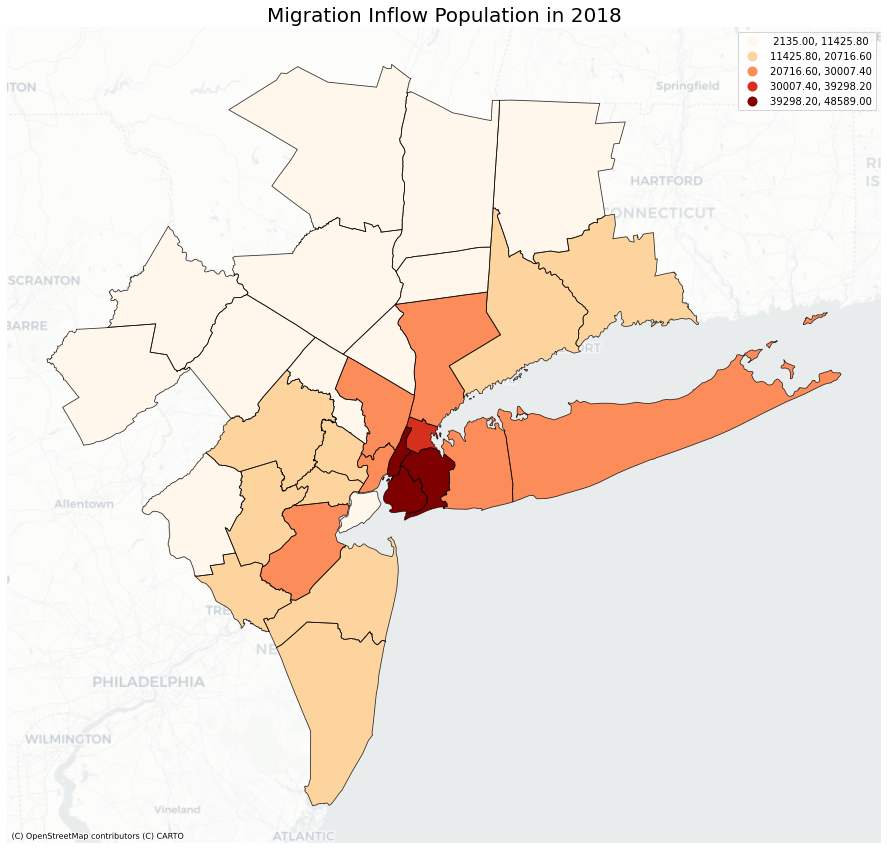

In [71]:
fig, axs = plt.subplots(1,1,figsize=(30, 15))
ax = axs

inflow_map_geo_crs.plot(ax=ax, 
                     column = 'Inflow_Population',
                     cmap='OrRd',
                     scheme='equal_interval',
                     legend=True)

inflow_map_geo_crs.plot(ax=ax,
                                                                           facecolor='none',
                                                                           edgecolor='black',
                                                                            lw=0.8,
                                                                            alpha=0.8)

ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron, alpha=0.5)

ax.axis("off")
ax.set_title("Migration Inflow Population in 2018",fontsize = 20)


### Outflow

In [72]:
outflow_map = Migration_Flow.drop(['County','Inflow'],axis=1)

In [73]:
outflow_map.columns = ['GEOID','Outflow_Population']

In [74]:
outflow_map = outflow_map.groupby(by=["GEOID"]).sum()

In [75]:
outflow_map

Outflow_Population
GEOID                    
09001               15281
09005                2752
09009                8883
34003               20899
34013               20566
34017               25448
34019                2507
34021                7508
34023               24549
34025               12023
34027               11107
34029                7510
34031               11069
34035               11268
34037                3014
34039               12883
36005               34633
36027                5118
36047               64898
36059               23745
36061               70987
36071                6970
36079                2649
36081               54934
36085                7675
36087                6263
36103               14416
36111                3083
36119               19246
42089                1787
42103                1427

In [76]:
outflow_map_geo = NYCMetro_5county_geodata_ready.merge(outflow_map,on='GEOID',how='left')

In [77]:
outflow_map_geo = outflow_map_geo.sort_values(by='Outflow_Population',ascending=False)

In [78]:
outflow_map_geo

GEOID                                           geometry  \
19  36061  MULTIPOLYGON (((-73.99950 40.70033, -73.99750 ...   
4   36047  POLYGON ((-74.04201 40.62605, -74.04199 40.626...   
5   36081  POLYGON ((-73.96262 40.73903, -73.96138 40.742...   
27  36005  MULTIPOLYGON (((-73.77336 40.85945, -73.77244 ...   
28  34017  POLYGON ((-74.16598 40.74807, -74.16546 40.751...   
3   34023  POLYGON ((-74.63023 40.34313, -74.63047 40.344...   
16  36059  MULTIPOLYGON (((-73.49097 40.91947, -73.48960 ...   
1   34003  POLYGON ((-74.27066 41.02103, -74.25046 41.060...   
2   34013  POLYGON ((-74.37623 40.76275, -74.37389 40.762...   
12  36119  MULTIPOLYGON (((-73.77278 40.88460, -73.77231 ...   
14  09001  MULTIPOLYGON (((-73.21717 41.14391, -73.21611 ...   
11  36103  MULTIPOLYGON (((-72.03683 41.24984, -72.03496 ...   
26  34039  POLYGON ((-74.45988 40.60003, -74.45738 40.602...   
8   34025  POLYGON ((-74.61458 40.18238, -74.59963 40.186...   
10  34035  POLYGON ((-74.79582 40.51527, -74.78903 40.512...   
17  34027  POLYGON ((-74.88923 40.78883, -74.88414 40.791...   
18  34031  POLYGON ((-74.50321 41.08587, -74.48244 41.103...   
0   09009  MULTIPOLYGON (((-72.76143 41.24233, -72.75973 ...   
24  36085  MULTIPOLYGON (((-74.16170 40.64586, -74.16060 ...   
9   34029  POLYGON ((-74.55311 40.07913, -74.53347 40.087...   
7   34021  POLYGON ((-74.94228 40.34089, -74.93228 40.339...   
20  36071  POLYGON ((-74.76247 41.44953, -74.76130 41.450...   
30  36087  POLYGON ((-74.21638 41.15619, -74.21135 41.159...   
25  36027  POLYGON ((-73.99991 41.45966, -73.99890 41.462...   
29  36111  POLYGON ((-74.74960 42.03075, -74.70277 42.052...   
23  34037  POLYGON ((-74.99172 41.09228, -74.98221 41.108...   
21  09005  POLYGON ((-73.51795 41.67086, -73.51678 41.687...   
22  36079  POLYGON ((-73.98138 41.32469, -73.98002 41.326...   
6   34019  POLYGON ((-75.19511 40.57969, -75.19466 40.581...   
15  42089  POLYGON ((-75.64929 41.12468, -75.64847 41.125...   
13  42103  POLYGON ((-75.35564 41.24112, -75.35050 41.244...   

                County_Name     Region  Outflow_Population  
19       New York, New York  NYC_Metro               70987  
4           Kings, New York  NYC_Metro               64898  
5          Queens, New York  NYC_Metro               54934  
27          Bronx, New York  NYC_Metro               34633  
28       Hudson, New Jersey  NYC_Metro               25448  
3     Middlesex, New Jersey  NYC_Metro               24549  
16         Nassau, New York  NYC_Metro               23745  
1        Bergen, New Jersey  NYC_Metro               20899  
2         Essex, New Jersey  NYC_Metro               20566  
12    Westchester, New York  NYC_Metro               19246  
14   Fairfield, Connecticut  NYC_Metro               15281  
11        Suffolk, New York  NYC_Metro               14416  
26        Union, New Jersey  NYC_Metro               12883  
8      Monmouth, New Jersey  NYC_Metro               12023  
10     Somerset, New Jersey  NYC_Metro               11268  
17       Morris, New Jersey  NYC_Metro               11107  
18      Passaic, New Jersey  NYC_Metro               11069  
0    New Haven, Connecticut  NYC_Metro                8883  
24       Richmond, New York  NYC_Metro                7675  
9         Ocean, New Jersey  NYC_Metro                7510  
7        Mercer, New Jersey  NYC_Metro                7508  
20         Orange, New York  NYC_Metro                6970  
30       Rockland, New York  NYC_Metro                6263  
25       Dutchess, New York  NYC_Metro                5118  
29         Ulster, New York  NYC_Metro                3083  
23       Sussex, New Jersey  NYC_Metro                3014  
21  Litchfield, Connecticut  NYC_Metro                2752  
22         Putnam, New York  NYC_Metro                2649  
6     Hunterdon, New Jersey  NYC_Metro                2507  
15     Monroe, Pennsylvania  NYC_Metro                1787  
13       Pike, Pennsylvania  NYC_Metro                1427

In [79]:
outflow_map_geo_crs = outflow_map_geo.to_crs(epsg=3857)

In [80]:
outflow_map_geo_crs.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 31 entries, 19 to 13
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   GEOID               31 non-null     object  
 1   geometry            31 non-null     geometry
 2   County_Name         31 non-null     object  
 3   Region              31 non-null     object  
 4   Outflow_Population  31 non-null     int64   
dtypes: geometry(1), int64(1), object(3)
memory usage: 1.5+ KB


Text(0.5, 1.0, 'Migration Outflow Population in 2018')

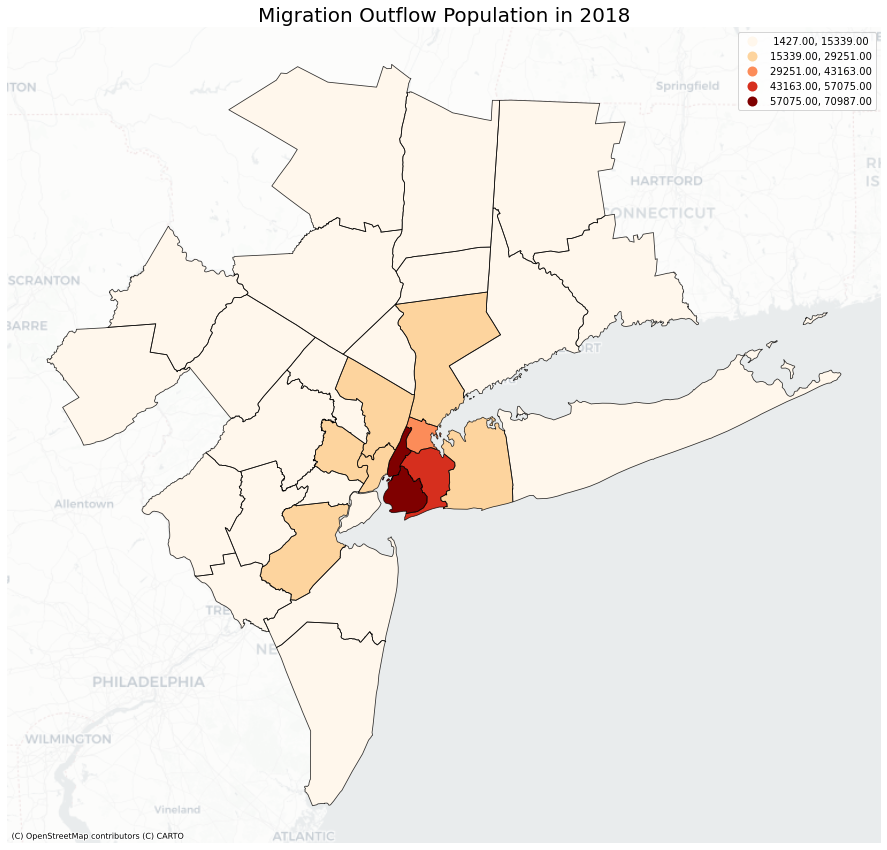

In [81]:
fig, axs = plt.subplots(1,1,figsize=(30, 15))
ax = axs

outflow_map_geo_crs.plot(ax=ax, 
                     column = 'Outflow_Population',
                     cmap='OrRd',
                     scheme='equal_interval',
                     legend=True)

outflow_map_geo_crs.plot(ax=ax,
                                                                           facecolor='none',
                                                                           edgecolor='black',
                                                                            lw=0.8,
                                                                            alpha=0.8)

ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron, alpha=0.5)

ax.axis("off")
ax.set_title("Migration Outflow Population in 2018",fontsize = 20)


Concluding Notes: 

We found Sankey Diagram a very powerful way to visualize A to B point flows. The graph-making cell itself is not that complicated, but preparing the data frame to be adopted by Sankey code is more challenging. But we are glad the diagram works. 

The Sankey diagrams show where are the top outflow and inflow destinations and where those flows come from. The second part of mapping for the migration flows also helps spatially understand where the flows are distributed on the map. We use both of them as a whole to illustrate the whoe picture of migration pattern in the region. 
